## Analytical compraison: our analysis (lemma 1) and the bounds from Sheffet '19, theorem 2

<ipython-input-12-9610cf90f012>:32: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(((1.0 - 1.0 / (curr_sigma**2)) ** curr_alpha) /


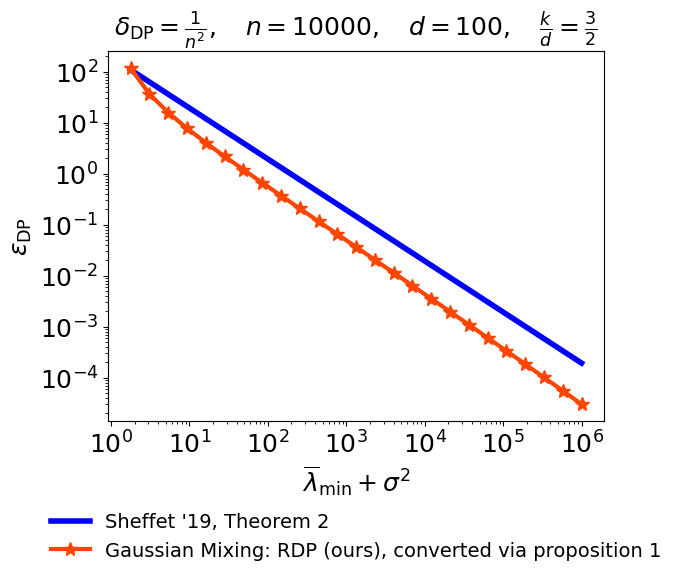

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 10000
d = 100
target_delta = 1 / (n**2)

k = 1.5 * d

sigma_values = np.logspace(np.log10(4/3), 3.0, 25)

linstyles = ['-', '--', '-.']

eps_opt_Matrix = []
eps_opt_Matrix_improved = []

for curr_sigma in sigma_values:
    if curr_sigma**2 < 2.0001:
      alpha_near_1 = np.logspace(np.log10(1.001), np.log10(curr_sigma**2), 100000)  # very fine near 1
      alpha_values_mixing = alpha_near_1
    else:
      alpha_near_1 = np.logspace(np.log10(1.001), np.log10(2), 100000)  # very fine near 1
      alpha_far = np.linspace(2.0001, curr_sigma**2, 100000)            # linear spacing up to sigma^2
      alpha_values_mixing = np.unique(np.concatenate([alpha_near_1, alpha_far]))

    KLDA_Matrix = []
    for curr_alpha in alpha_values_mixing:
      opt_KLDA_matrix = 0.0
      opt_t = 0.0
      KLDA_Matrix.append((k / (2 * (curr_alpha - 1))) * (
          np.log(((1.0 - 1.0 / (curr_sigma**2)) ** curr_alpha) /
                 (1.0 - curr_alpha / (curr_sigma**2)))
        ))
    # Compute final functions

    # Improved conversion (via [Cannone '20])
    eps_opt_Matrix_improved.append(np.min(KLDA_Matrix + np.log1p(-1 / alpha_values_mixing) - np.log(target_delta * alpha_values_mixing) / (alpha_values_mixing - 1)))

    # Standard conversion (via [Mironov '17])
    eps_opt_Matrix.append(np.min(KLDA_Matrix + np.log(1/target_delta) / (alpha_values_mixing - 1)))

# Sheffet's bound: Sheffet '19 (https://proceedings.mlr.press/v98/sheffet19a/sheffet19a.pdf) , theorem 2
eps_val_sheffet = 2.0 * ((np.log(4.0/target_delta) + np.sqrt(2.0*k*np.log(4.0/target_delta))))/(sigma_values**2)

# Plot Sheffet's Bound
plt.plot(sigma_values**2, eps_val_sheffet,
         label=r"Sheffet '19, Theorem 2",
         linewidth=4.0,
         linestyle='-',
         color='blue')

# Plot Gaussian Mixing (ours)
plt.plot(sigma_values**2, eps_opt_Matrix_improved,
         label=rf"Gaussian Mixing: RDP (ours), converted via proposition 1",
         linewidth=3.0,
         marker='*',
         markersize=10,
         color='orangered')


# Labels and Title
plt.xlabel(r"$\overline{\lambda}_{\mathrm{min}} + \sigma^2$", fontsize=18)
plt.ylabel(r"$\varepsilon_{\mathrm{DP}}$", fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(
    rf"$\delta_{{\mathrm{{DP}}}} = \frac{{1}}{{n^2}},\quad n = {n},\quad d = {d},\quad \frac{{k}}{{d}} = \frac{{3}}{{2}}$",
    fontsize=18,
    fontweight="bold",
    loc="center",
)

plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.2),  # move further down
    fontsize=14,
    frameon=False,
    ncol=1
)

plt.savefig("Comparison_Sheffet_Ours_k_" + str(k) + "_d_" + str(d) + ".pdf", format="pdf", bbox_inches="tight")
plt.show()

# Ratio between bounds

<ipython-input-13-88a65829df62>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


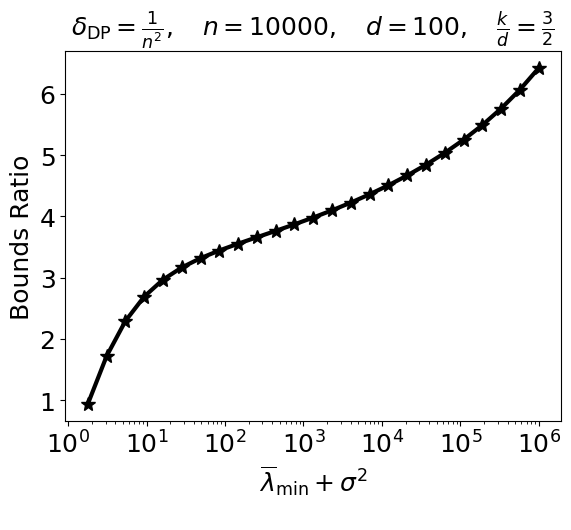

In [13]:
# Plot Sheffet's Bound
plt.plot(sigma_values**2, eps_val_sheffet/eps_opt_Matrix_improved,
         linewidth=3.0,
         marker='*',
         markersize=10,
         color='black')

# Labels and Title
plt.xlabel(r"$\overline{\lambda}_{\mathrm{min}} + \sigma^2$", fontsize=18)
plt.ylabel(r"Bounds Ratio", fontsize=18)
plt.xscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(
    rf"$\delta_{{\mathrm{{DP}}}} = \frac{{1}}{{n^2}},\quad n = {n},\quad d = {d},\quad \frac{{k}}{{d}} = \frac{{3}}{{2}}$",
    fontsize=18,
    fontweight="bold",
    loc="center",
)

plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.2),  # move further down
    fontsize=14,
    frameon=False,
    ncol=1
)

plt.savefig("Comparison_Ratio_Sheffet_Ours_k_" + str(k) + "_d_" + str(d) + ".pdf", format="pdf", bbox_inches="tight")
plt.show()